# Structurer son code avec des objets

--- 

# Appréhender une interface graphique 

**Structurer son code avec des objets**

--- 

## Règle de base

Dissocier le **modèle**, le **contrôleur** et l'**affichage** 

**Structurer son code avec des objets**

--- 

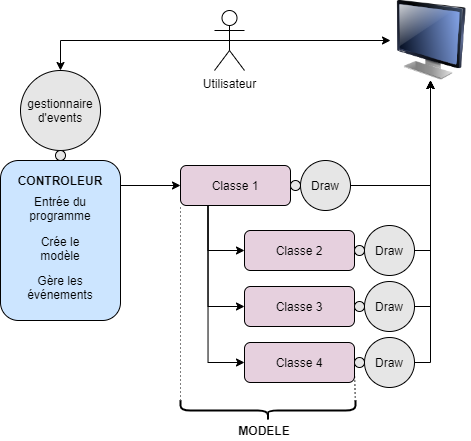

**Structurer son code avec des objets**

--- 

## Exemple d'un jeu à 1 joueur, humain

**SNAKE**

Une **arène** met en scène un **serpent** qui peut se déplacer dans chacune des 4 directions via une interaction de l'utilisateur par les touches du clavier. S'il heurte les bords de l'arène ou lui-même ou d'éventuels autres obstacles, la partie se termine.

De temps en temps peuvent apparaître des **pommes** qui, si le serpent les avale, donnent des points mais allongent aussi la taille du serpent.

Structurer son code avec des objets > **SNAKE**

--- 

## Exemple de code affreux

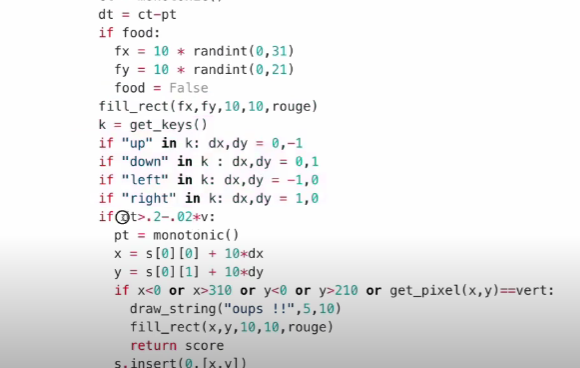

Structurer son code avec des objets > **SNAKE**

--- 

## Structure possible

(il y'en a d'autres bien sûr)

- Une classe `Game` pour le **contrôleur** principal
- Une classe `Arena` pour la classe principale du **modèle**
- Une classe `Snake` pour modéliser le serpent
- Une classe `Apple` pour modéliser les pommes

```python
class Apple:
    def __init__(self, pos, arena, screen):
        self.arena = arena
        self.screen = screen
        self.pos = pos

class Snake:
    def __init__(self, arena, screen):
        self.arena = arena
        self.screen = screen
        self.pos = [[COLS//2 + i, ROWS//2] for i in range(-LENGTH//2, LENGTH//2)]
        self.head = -1
        self.delta = 0, 0
```

```python
class Arena:
    def __init__(self, game):
        self.game = game
        self.screen = game.screen
        self.snake = Snake(self, self.screen)
        self.apples = [Apple(self.random_position(), self, self.screen) 
                                                       for _ in range(3)]

class Game:
    def __init__(self):
        self.screen = # un écran initialisé par la bibliothèque d'interface
        self.arena = Arena(self)
        self.gameover = False
```

```python
    ...
       
    def start(self):
        # Initialiser des trucs
        # lancer la boucle de jeu
        
    def loop(self):
        # Tant que la partie n'est pas finie
        # gérer les événements
        # lancer les actions à faire par le modèle
        # mettre à jour l'écran
        # quitter
        
# Programme principal

mon_jeu = Game()
mon_jeu.start()
```

**Structurer son code avec des objets**

--- 

## Puis, à chaque action du jeu...

se poser les bonnes questions :

- qui doit faire cette action (quelle classe implémente la méthode) ?
- vers lui-même ou vers quelqu'un d'autre ?
- de quoi a-t-il besoin ? (dois-je rajouter une propriété que j'aurais oublié)
- est-ce qu'il y a une fonction de la bibliothèque qui réalise ça ?
- ... 

**Appréhender une interface graphique (IHM)**

--- 

## Choisir une bibliothèque d'interface... 

`turtle`, `tkinter`, `processing`, ... pour nous ce sera `pygame`

1. Regarder un premier tutoriel pour débutant et **le reproduire** (au moins partiellement) ; par exemple : [tuto en 10 épisodes pour créer un jeu complet](https://www.youtube.com/watch?v=8J8wWxbAdFg) 
2. Refaire le début de votre tutoriel mais en y intégrant la POO...
3. en ayant la **doc officielle** ouverte dans une fenêtre pour pygame il s'agit de https://devdocs.io/pygame/

IHM > **pygame**

--- 

### 1. d'initialiser les différents modules

`pygame`  est un _framework_, une bibliothèque ie un **ensemble de modules**

- pygame.display
- pygame.event
- pygame.draw
- ...

### 2. créer une fenêtre graphique

### 3. réaliser les tâches relevant de l'IHM :
- **gérer les événements**
- **dessiner ou afficher des éléments**
- jouer des sons
- ...

### 4. quitter

IHM > pygame > **initialiser les modules**

--- 

**Où ?** dans la méthode `start` bien sûr...

```python
def start(self):
    pygame.init()
    pygame.display.set_caption('Another SNAKE game...')
    ...
```

IHM > pygame > **créer la fenêtre graphique**

--- 

**Où ?** dans le constructeur du contrôleur pour la création, dans le `start` pour les réglages

```python
def __init__(self):
    self.screen = pygame.display.set_mode((WIDTH, HEIGHT))
    ...
    
def start(self):
    pygame.init()
    pygame.display.set_caption('Another SNAKE game...')
    self.screen.fill(BG_COLOR)
    ...
```

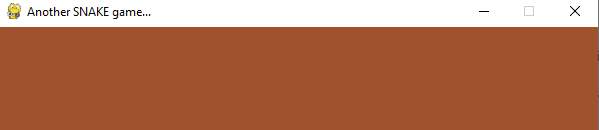

IHM > pygame > **créer la fenêtre graphique**

--- 

Mais que fait `pygame.display.set_mode` ? et comment mettre une couleur de fond (c'est tout noir par défaut) ?

Exemple d'utilisation de la bibliothèque : [voir la vidéo](https://youtu.be/M2brdRBlaSY)

Les constantes pourront être définies dans un module `constantes.py` voici par exemple le contenu de mon fichier :

```python
# DIMENSIONS ET COORDONNEES
# ---
WIDTH = 600
HEIGHT = 450
SIZE = 10
COLS = WIDTH // SIZE
ROWS = HEIGHT // SIZE
LENGTH = 4

# COULEURS
# ---
HEAD_COLOR = 'lightcoral'
BODY_COLOR = 'lightslategrey'
APPLE_COLOR = 'greenyellow'
BG_COLOR = 'sienna'

# GAME MANAGEMENT
# ---
MODE_START = 0
MODE_LOOP = 1
MODE_STOP = 2

CLOCK_TICK = 100  # milliseconds
```

IHM > pygame > SNAKE > **Modèle**

--- 

Dessiner c'est créer un affichage à l'écran à partir des informations du modèle. L'unité de la fenêtre graphique est le pixel. Les dimensions de cette fenêtre sont données par les constantes `WIDTH` et `HEIGHT`. Mais quel va être le modèle de notre serpent ? sûrement pas la donnée de tous les pixels qui le compose à l'écran.

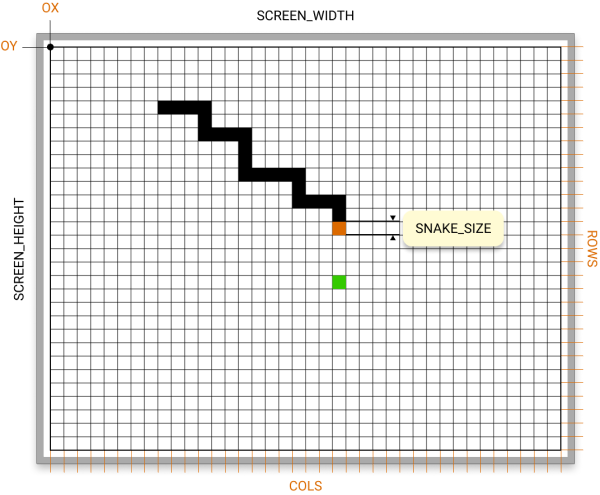

IHM > pygame > SNAKE > **Modèle**

--- 

```python
class Snake:
    def __init__(self, arena, screen):
        ...
        self.pos = [[COLS//2 + i, ROWS//2] for i in range(-LENGTH//2, LENGTH//2)]
        self.head = -1
        ...
```

IHM > pygame > SNAKE > **Modèle**

--- 

- `SIZE` vaut 10
- `COLS` vaut 60 (600 // 10)
- `ROWS` vaut 45 (450 // 10)

Notre **modèle** pour le terrain est une matrice de 45 lignes de 60 colonnes. Nous n'avons besoin que de mémoriser certaines de ces cases : celles où se trouvent des fragments de serpent et des pommes.

La liste initiale qui modélise le positionnement du serpent est :

```python
[[28, 22], [29, 22], [30, 22], [31, 22]]
```

IHM > pygame > SNAKE > **Modèle vers Affichage**

--- 

### Passer des coordonnées du modèle aux pixels de l'écran

```python
def model_to_xy(ij):
    i, j = ij
    return i * SIZE, j * SIZE
```

Ainsi le serpent initial :
```python
[[28, 22], [29, 22], [30, 22], [31, 22]]
```

doit être dessiné par 4 carrés de 10 de côtés aux coordonnées suivantes :
```python
(280, 220), (290, 220), (300, 220), (310, 220)
```

C'est ce que fait la méthode `draw` de notre `Snake`...

IHM > pygame > SNAKE > **Modèle vers Affichage**

--- 

```python
class Snake:
    ...
    
    def draw(self):
        
        # draw body
        for i in range(len(self)):
            x, y = model_to_xy(self.pos[i])
            pygame.draw.rect(self.screen, BODY_COLOR, pygame.Rect(x, y, SIZE, SIZE))
        
        # draw head
        x, y = model_to_xy(self.pos[self.head])
        pygame.draw.rect(self.screen, HEAD_COLOR, pygame.Rect(x, y, SIZE, SIZE))
```

IHM > pygame > SNAKE > **Modèle**

--- 

### Et maintenant comment fait-on bouger le serpent ?

Voyons la gestion des **événements**

IHM > pygame > **Gestion des événements**

--- 

Les événements arrivent sans cesse et sont stockés dans une file (premier arrivé premier sorti) appelée **_buffer_**:

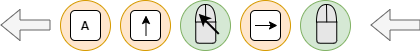

La méthode `pygame.event.get()` fournit la liste des événements en attente. On peut la parcourir avec une simple boucle :

```python
for event in pygame.event.get():
    # Traitement
```

IHM > pygame > **Gestion des événements**

--- 

Un événement possède un **type** (juste un entier sous la forme d'une constante) et puis, des **attributs** différents suivant le type :

| type d'événement       | les attributs disponibles |
| ---------------------- | ------------------------- |
| pygame.QUIT            | _aucun_                   |
| pygame.KEYDOWN         | key, mod ...              |
| pygame.KEYUP           | key, mod ...              |
| pygame.KEYDOWN         | key, mod ...              |
| pygame.MOUSEMOTION     | pos, rel, buttons         |
| pygame.MOUSEBUTTONUP   | pos, button               |
| pygame.MOUSEBUTTONDOWN | pos, button               |



```python
if event.type == pygame.KEYDOWN:
    if event.key == pygame.K_UP:
        print('Vous avez appuyé sur la Flèche vers le haut')
```

IHM > pygame > SNAKE > **Contrôler**

--- 

**Que doit faire le contrôleur si on appuie sur <span style="display: inline-block; width: 20px; text-align: center; font-size:1.2em; border:1px solid; border-radius:3px;">&darr;</span> ?**

> Demander au serpent de changer de direction (aller vers le bas)<br>
> Et passer en mode MOVE ie qu'on sait que le serpent avance

IHM > pygame > SNAKE > **Contrôler**

--- 

```python
class Game:
    ...
    def handle_event(self, event):
        if event.type == pygame.KEYDOWN:
            if event.key == pygame.K_DOWN:
                self.arena.snake_change_direction(0, 1)
                self.mode = MODE_MOVE
            ...
    
    def loop(self):
        while not self.gameover:
            for event in pygame.event.get():
                self.handle_event(event)
            ...
```

IHM > pygame > SNAKE > **Contrôler**

--- 

**Que doit faire le serpent quand on lui demande de changer de direction ?**

```python
class Snake:
    ...
    def change_direction(self, dx, dy):
        self.delta = dx, dy
```

IHM > pygame > SNAKE > **Contrôler**

--- 

**Que doit faire le serpent pour bouger ?**

> Ajouter devant sa tête la nouvelle position <br>
> Effacer sa queue

```python
class Snake:
    ...
    def move(self):
        x, y = self.pos[self.head]
        dx, dy = self.delta
        self.pos.append((x+dx, y+dy))
        self.pos.pop(0)
```

IHM > pygame > SNAKE > **Contrôler**

--- 

**Illustrons le modèle... quelque chose cloche ?**

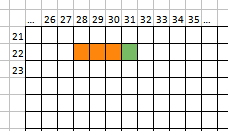  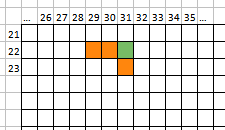

IHM > pygame > SNAKE > **Contrôler**

--- 

**ATTENTION le modèle n'est pas l'affichage ! Le modèle n'a pas de couleur, juste des coordonnées...**

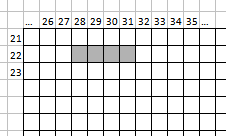 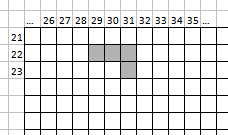

Et la tête est toujours la dernière case ie ici celle en 31, 23... c'est dans la méthode `draw` que cette case sera coloriée différemment.

IHM > pygame > SNAKE > **Conclusion**

--- 

1. La séparation **contrôleur** / **modèle** / **affichage** <html>&rArr;</html> méthodes courtes et simples !
2. Continuer en modélisant les pommes : lorsque le serpent passe sur une pomme... mais au fait...<br>
   **comment le serpent sait qu'il passe sur une pomme ?**
3. ~~Petite erreur du modèle ? Le contrôleur ne devrait-il pas passer par l'Arène pour donner les ordres au serpent ?~~


**Structurer son code avec des objets** / **Appréhender l'IHM**

## Et un jeu à 2 joueurs ?

**Jeu à 2 joueurs**

--- 

### IA vs IA, pas d'événement

```python
def loop(self):
    while not self.gameover:
        joueur = self.joueurs[self.joueur_id]
        self.gameover = joueur.play()
        self.suivant()
        self.afficher()
```

**Jeu à 2 joueurs**

--- 

### Humain vs Humain/IA, tour par tour

```python
class Game:
    ...
    def handle_event(self, event):
        if event.type == type1:
            self.board.play()
            self.suivant()
            ...
    
    def loop(self):
        while not self.gameover:
            for event in pygame.event.get():
                self.handle_event(event)
            self.board.draw()
            pygame.display.flip()
```